In [17]:
from nilearn.maskers import NiftiMasker
from nilearn import datasets
from nilearn.maskers import NiftiLabelsMasker
import os
from glob import glob

In [18]:
path = glob('./dataset/sub-pixar*.nii.gz')


In [19]:
path[0]

'./dataset/sub-pixar095_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'

In [20]:
# define atlas
atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')

# The first label correspond to the background
print('The atlas contains {} non-overlapping regions'.format(
    len(atlas.labels) - 1))

The atlas contains 48 non-overlapping regions


In [21]:
masker = NiftiLabelsMasker(atlas.maps,
                           labels=atlas.labels,
                           standardize=True)

In [22]:
masker.fit()

NiftiLabelsMasker(labels=['Background', 'Frontal Pole', 'Insular Cortex',
                          'Superior Frontal Gyrus', 'Middle Frontal Gyrus',
                          'Inferior Frontal Gyrus, pars triangularis',
                          'Inferior Frontal Gyrus, pars opercularis',
                          'Precentral Gyrus', 'Temporal Pole',
                          'Superior Temporal Gyrus, anterior division',
                          'Superior Temporal Gyrus, posterior division',
                          'Middle Temporal Gyrus, anterior division',
                          'Mi...
                          'Lateral Occipital Cortex, superior division',
                          'Lateral Occipital Cortex, inferior division',
                          'Intracalcarine Cortex', 'Frontal Medial Cortex',
                          'Juxtapositional Lobule Cortex (formerly '
                          'Supplementary Motor Cortex)',
                          'Subcallosal Cortex', 'Paracingulate Gyrus',
                          'Cingulate Gyrus, anterior division', ...],
                  labels_img=<nibabel.nifti1.Nifti1Image object at 0x7f365c5293c0>,
                  standardize=True)

In [23]:
report = masker.generate_report()
report

/home/ananta/.local/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:343: UserWarning: No image provided to fit in NiftiLabelsMasker. Plotting ROIs of label image on the MNI152Template for reporting.
  warnings.warn(msg)
/home/ananta/.local/lib/python3.10/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


label value,region name,size (in mm^3),relative size (in %)
1,Frontal Pole,123176,11.75
2,Insular Cortex,18728,1.79
3,Superior Frontal Gyrus,40640,3.88
4,Middle Frontal Gyrus,42528,4.06
5,"Inferior Frontal Gyrus, pars triangularis",8824,0.84
6,"Inferior Frontal Gyrus, pars opercularis",11072,1.06
7,Precentral Gyrus,68584,6.54
8,Temporal Pole,37688,3.59
9,"Superior Temporal Gyrus, anterior division",4168,0.4
10,"Superior Temporal Gyrus, posterior division",14640,1.4


In [24]:
for i in range(5):
signals = masker.transform(path[0])
# signals is a 2D matrix, (n_time_points x n_regions)
signals.shape

(168, 48)

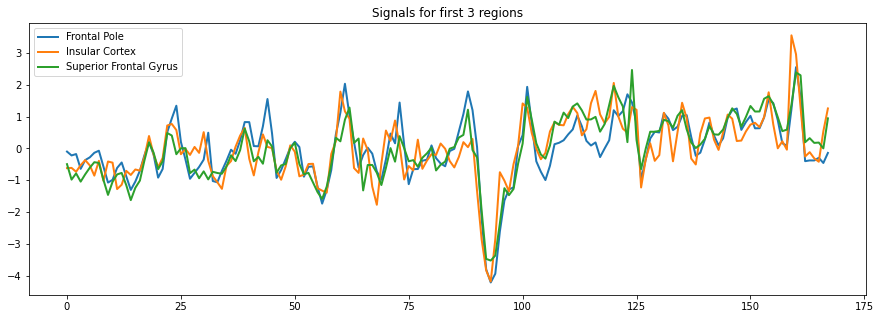

In [25]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
for label_idx in range(3):
    ax.plot(signals[:, label_idx],
            linewidth=2,
            label=atlas.labels[label_idx + 1])  # 0 is background
ax.legend(loc=2)
ax.set_title("Signals for first 3 regions")
plt.show()